# Load data

#### Python_Kernel -> sklearnR (Python ver 3.9.7)
#### check_point -> 2022-07-28 21:47

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib as mpl

from glob import glob
from tqdm import tqdm
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'missingno'

# Configuration

In [2]:
# Korean font
from matplotlib import font_manager, rc
try:
    font_path = "C:/Windows/Fonts/malgun.TTF"
    Kfont = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=Kfont)
except:
    pass

# Fix minus presentation
mpl.rcParams['axes.unicode_minus'] = False

NameError: name 'mpl' is not defined

# Custom functions

In [ ]:
def to_datetime_format(df:pd.DataFrame, col_nm:str='ymdhm', as_index=False) -> pd.DataFrame:
    df[col_nm] = pd.to_datetime(df[col_nm], infer_datetime_format=True) #format = "%Y-%m-%d %H%M")
    df = df.sort_values(by=col_nm, ascending=True)
    if as_index:
        df.set_index(col_nm, inplace=True)
    
    return df 

# Load data

### Data description
Data  

├ Water Data

│ ├ data_2012.csv

│   ├ ymdhm : 년월일시분

│   ├ swl : 팔당댐 현재수위 (단위: El.m)

│   ├ inf : 팔당댐 유입량 (단위: m^3/s)

│   ├ sfw : 팔당댐 저수량 (단위: 만m^3)

│   ├ ecpc : 팔당댐 공용량 (단위: 백만m^3)

│   ├ tototf : 총 방류량 (단위: m^3/s)

│   ├ tide_level : 강화대교 조위 (단위: cm)

│   ├ wl_1018662 : 청담대교 수위 (단위: cm)

│   ├ fw_1018662 : 청담대교 유량 (단위: m^3/s)

│   ├ wl_1018680 : 잠수교 수위 (단위: cm)

│   ├ fw_1018680 : 잠수교 유량 (단위: m^3/s)

│   ├ wl_1018683 : 한강대교 수위 (단위: cm)

│   ├ fw_1018683 : 한강대교 유량 (단위: m^3/s)

│   ├ wl_1019630 : 행주대교 수위 (단위: cm)

│   └ fw_1019630 : 행주대교 유량 (단위: m^3/s)

│ ├ data_2013.csv

…

└ └ data_2022.csv

└ RainFall Data

│ ├ rf_2012.csv

│   ├ YMDHM : 년월일시분

│   ├ rf_10184100 : 대곡교 강수량

│   ├ rf_10184110 : 진관교 강수량

│   └ rf_10184140 : 송정동 강수량

│ ├ rf_2013.csv

…

└ └ rf_2022.csv

### Load sample submission data

In [ ]:
# Load sample submission data
df_smp_subm = pd.read_csv('C:/Everydata/competition_data/sample_submission.csv')
df_smp_subm

# Get target columns
tgt_col = df_smp_subm.columns[1:]

### Load water data

In [ ]:
# Get water level data list
wl_data_list = sorted(glob("C:/Everydata/competition_data/water_data/*.csv"))
wl_data_list

['C:/Everydata/competition_data/water_data\\data_2012.csv',
 'C:/Everydata/competition_data/water_data\\data_2013.csv',
 'C:/Everydata/competition_data/water_data\\data_2014.csv',
 'C:/Everydata/competition_data/water_data\\data_2015.csv',
 'C:/Everydata/competition_data/water_data\\data_2016.csv',
 'C:/Everydata/competition_data/water_data\\data_2017.csv',
 'C:/Everydata/competition_data/water_data\\data_2018.csv',
 'C:/Everydata/competition_data/water_data\\data_2019.csv',
 'C:/Everydata/competition_data/water_data\\data_2020.csv',
 'C:/Everydata/competition_data/water_data\\data_2021.csv',
 'C:/Everydata/competition_data/water_data\\data_2022.csv']

In [ ]:
# check water level data
pd.read_csv(wl_data_list[0]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         26495 non-null  float64
 2   inf         26495 non-null  float64
 3   sfw         26495 non-null  float64
 4   ecpc        26495 non-null  float64
 5   tototf      26495 non-null  float64
 6   tide_level  25720 non-null  float64
 7   wl_1018662  26496 non-null  float64
 8   fw_1018662  26496 non-null  float64
 9   wl_1018680  26496 non-null  float64
 10  fw_1018680  26496 non-null  float64
 11  wl_1018683  26496 non-null  float64
 12  fw_1018683  26496 non-null  float64
 13  wl_1019630  26496 non-null  float64
 14  fw_1019630  26496 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [ ]:
# Check most recent water level data
pd.read_csv(wl_data_list[-1])

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2022-05-01 00:00,25.20,739.36,218.73,25.27,124.36,81.0,290.7,337.64,284.2,NaN,279.0,0.00,269.3,471.08
1,2022-05-01 00:10,25.20,124.48,218.73,25.27,124.48,72.0,291.7,343.69,284.2,NaN,279.0,145.14,266.3,438.33
2,2022-05-01 00:20,25.20,124.20,218.73,25.27,124.20,64.0,290.7,337.64,284.2,NaN,279.0,232.22,264.3,417.17
3,2022-05-01 00:30,25.20,124.35,218.73,25.27,124.35,58.0,289.7,331.65,284.2,NaN,279.0,302.71,263.3,406.79
4,2022-05-01 00:40,25.19,0.00,218.36,25.64,124.42,58.0,287.7,319.84,284.2,NaN,279.0,340.03,264.3,417.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,2022-07-18 23:10,25.04,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40
11372,2022-07-18 23:20,25.04,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88
11373,2022-07-18 23:30,25.04,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90
11374,2022-07-18 23:40,25.04,259.13,212.86,31.14,259.13,458.0,0.0,454.91,0.0,NaN,0.0,-1023.37,0.0,1073.46


In [ ]:
# Concat whole water level data
df_wl_all = pd.concat([to_datetime_format(pd.read_csv(path), as_index=True) for path in wl_data_list], axis=0)

### Load rainfall data

In [ ]:
# Get rainfall data list
rf_data_list = sorted(glob("C:/Everydata/competition_data/rf_data/*.csv"))
rf_data_list

['C:/Everydata/competition_data/rf_data\\rf_2012.csv',
 'C:/Everydata/competition_data/rf_data\\rf_2013.csv',
 'C:/Everydata/competition_data/rf_data\\rf_2014.csv',
 'C:/Everydata/competition_data/rf_data\\rf_2015.csv',
 'C:/Everydata/competition_data/rf_data\\rf_2016.csv',
 'C:/Everydata/competition_data/rf_data\\rf_2017.csv',
 'C:/Everydata/competition_data/rf_data\\rf_2018.csv',
 'C:/Everydata/competition_data/rf_data\\rf_2019.csv',
 'C:/Everydata/competition_data/rf_data\\rf_2020.csv',
 'C:/Everydata/competition_data/rf_data\\rf_2021.csv',
 'C:/Everydata/competition_data/rf_data\\rf_2022.csv']

In [ ]:
# check rainfall data
pd.read_csv(rf_data_list[0]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ymdhm        26496 non-null  object 
 1   rf_10184100  26496 non-null  float64
 2   rf_10184110  26496 non-null  float64
 3   rf_10184140  26496 non-null  float64
dtypes: float64(3), object(1)
memory usage: 828.1+ KB


In [ ]:
# Check most recent rainfall data
pd.read_csv(rf_data_list[-1])

,ymdhm,rf_10184100,rf_10184110,rf_10184140
0,2022-05-01 00:00,0.0,0.0,0.0
1,2022-05-01 00:10,0.0,0.0,0.0
2,2022-05-01 00:20,0.0,0.0,0.0
3,2022-05-01 00:30,0.0,0.0,0.0
4,2022-05-01 00:40,0.0,0.0,0.0
...,...,...,...,...
11371,2022-07-18 23:10,0.0,0.0,0.0
11372,2022-07-18 23:20,0.0,0.0,0.0
11373,2022-07-18 23:30,0.0,0.0,0.0
11374,2022-07-18 23:40,0.0,0.0,0.0


In [ ]:
# Concat whole rainfall data
df_rf_all = pd.concat([to_datetime_format(pd.read_csv(path), as_index=True) for path in rf_data_list], axis=0)

# Preprocessing & Visualization

### Simple missing check for water level data

In [ ]:
# Replace value from 0 to None in the target columns
df_wl_all[tgt_col] = df_wl_all[tgt_col].replace({0:None})

# Divide water data by date
df_wl = df_wl_all[df_wl_all.index < pd.to_datetime('2022-06-01')]
df_wl_fut = df_wl_all[df_wl_all.index >= pd.to_datetime('2022-06-01')]

# Get target columns in the train time line
df_tgt_past = df_wl[tgt_col]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269424 entries, 2012-05-01 00:00:00 to 2022-05-31 23:50:00
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   swl         268717 non-null  float64
 1   inf         268717 non-null  float64
 2   sfw         268717 non-null  float64
 3   ecpc        268717 non-null  float64
 4   tototf      268717 non-null  float64
 5   tide_level  264501 non-null  float64
 6   wl_1018662  269365 non-null  object 
 7   fw_1018662  254260 non-null  float64
 8   wl_1018680  269365 non-null  object 
 9   fw_1018680  79487 non-null   float64
 10  wl_1018683  269365 non-null  object 
 11  fw_1018683  268145 non-null  float64
 12  wl_1019630  269365 non-null  object 
 13  fw_1019630  269365 non-null  float64
dtypes: float64(10), object(4)
memory usage: 30.8+ MB


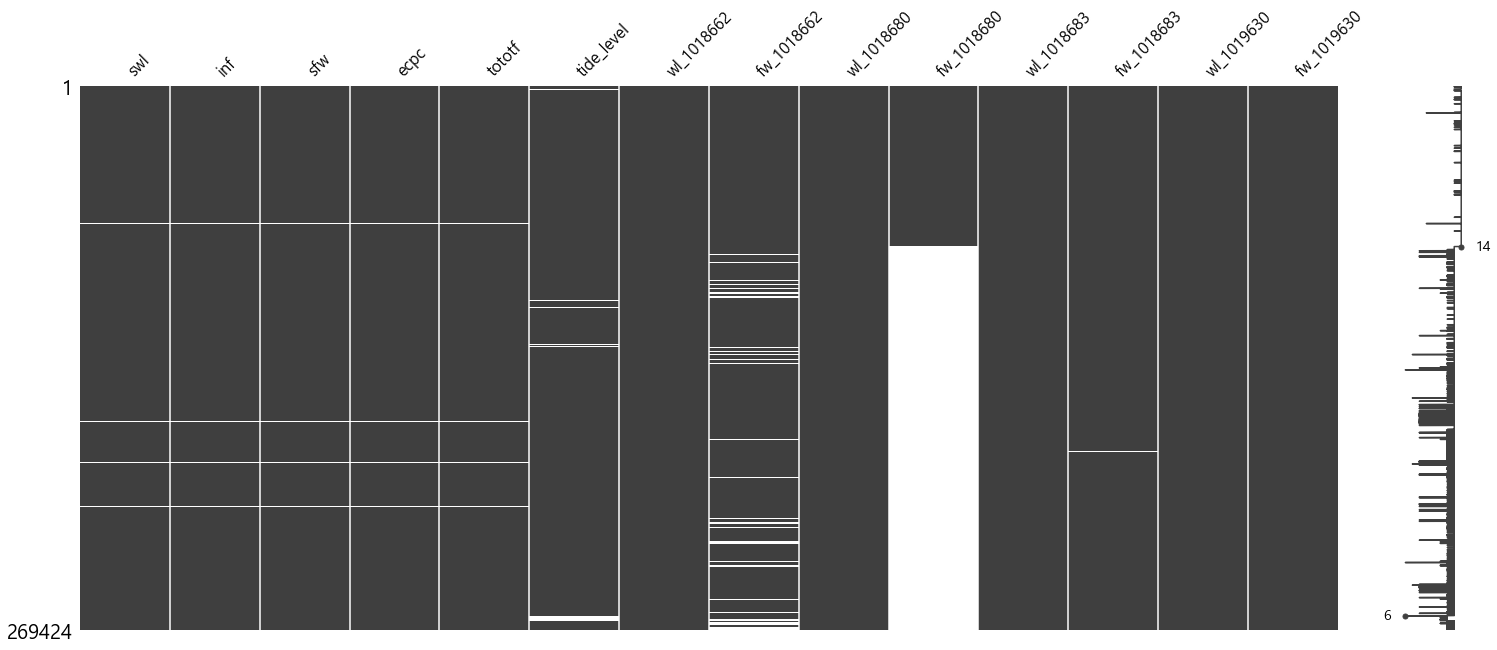

In [ ]:
# Water level data except test time missing check
msno.matrix(df_wl)
df_wl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6912 entries, 2022-06-01 00:00:00 to 2022-07-18 23:50:00
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   swl         6876 non-null   float64
 1   inf         6876 non-null   float64
 2   sfw         6876 non-null   float64
 3   ecpc        6876 non-null   float64
 4   tototf      6876 non-null   float64
 5   tide_level  6908 non-null   float64
 6   wl_1018662  0 non-null      object 
 7   fw_1018662  5696 non-null   float64
 8   wl_1018680  0 non-null      object 
 9   fw_1018680  0 non-null      float64
 10  wl_1018683  0 non-null      object 
 11  fw_1018683  6912 non-null   float64
 12  wl_1019630  0 non-null      object 
 13  fw_1019630  6912 non-null   float64
dtypes: float64(10), object(4)
memory usage: 810.0+ KB


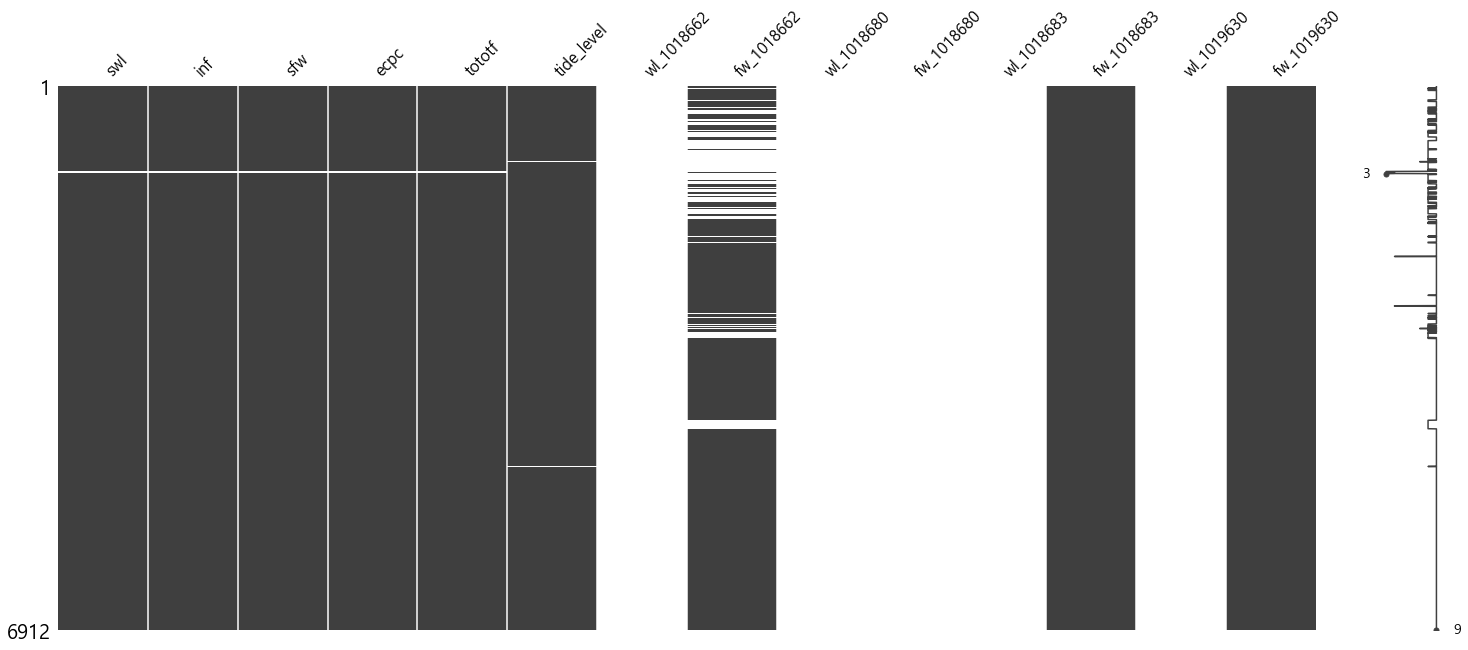

In [ ]:
# Water level future dataset missing check
msno.matrix(df_wl_fut)
df_wl_fut.info()

### Simple missing check for rainfall data

In [ ]:
# Divide water data by date
df_rf = df_rf_all[df_rf_all.index < pd.to_datetime('2022-06-01')]
df_rf_fut = df_wl_all[df_rf_all.index >= pd.to_datetime('2022-06-01')]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269424 entries, 2012-05-01 00:00:00 to 2022-05-31 23:50:00
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rf_10184100  269424 non-null  float64
 1   rf_10184110  269424 non-null  float64
 2   rf_10184140  269424 non-null  float64
dtypes: float64(3)
memory usage: 8.2 MB


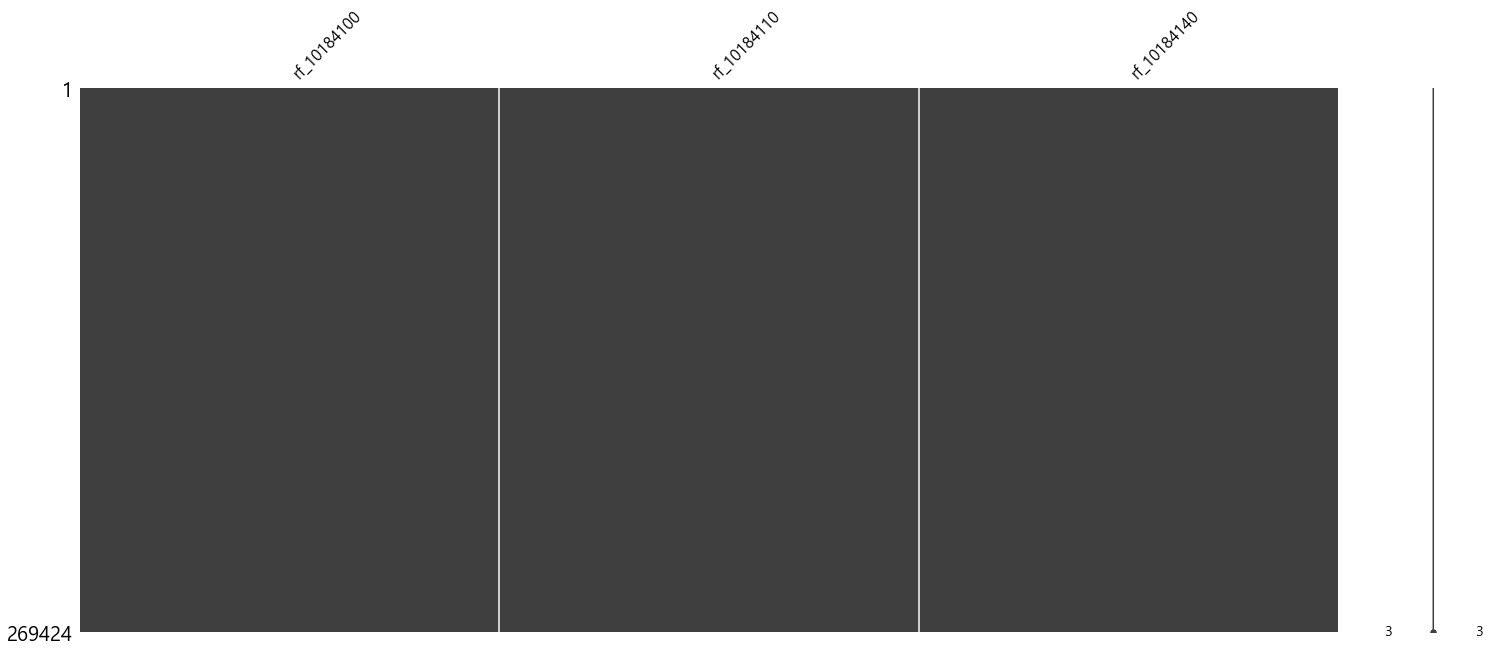

In [ ]:
# Rainfall data except test time missing check
msno.matrix(df_rf)
df_rf.info()